In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import shutil
import re
import textwrap
from io import StringIO
from bioservices import KEGG, UniProt
from Bio import Entrez, SeqIO
from Bio.KEGG import REST
from Bio.KEGG.KGML import KGML_parser
from Bio.Graphics.KGML_vis import KGMLCanvas
from IPython.display import Image, HTML, display

C:\Users\FireR\AppData\Local\Temp\ipykernel_20168\109026132.py:2: DtypeWarning: Columns (27,28,30,34,44,48,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter='\t')
C:\Users\FireR\AppData\Local\Temp\ipykernel_20168\109026132.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(short_label)


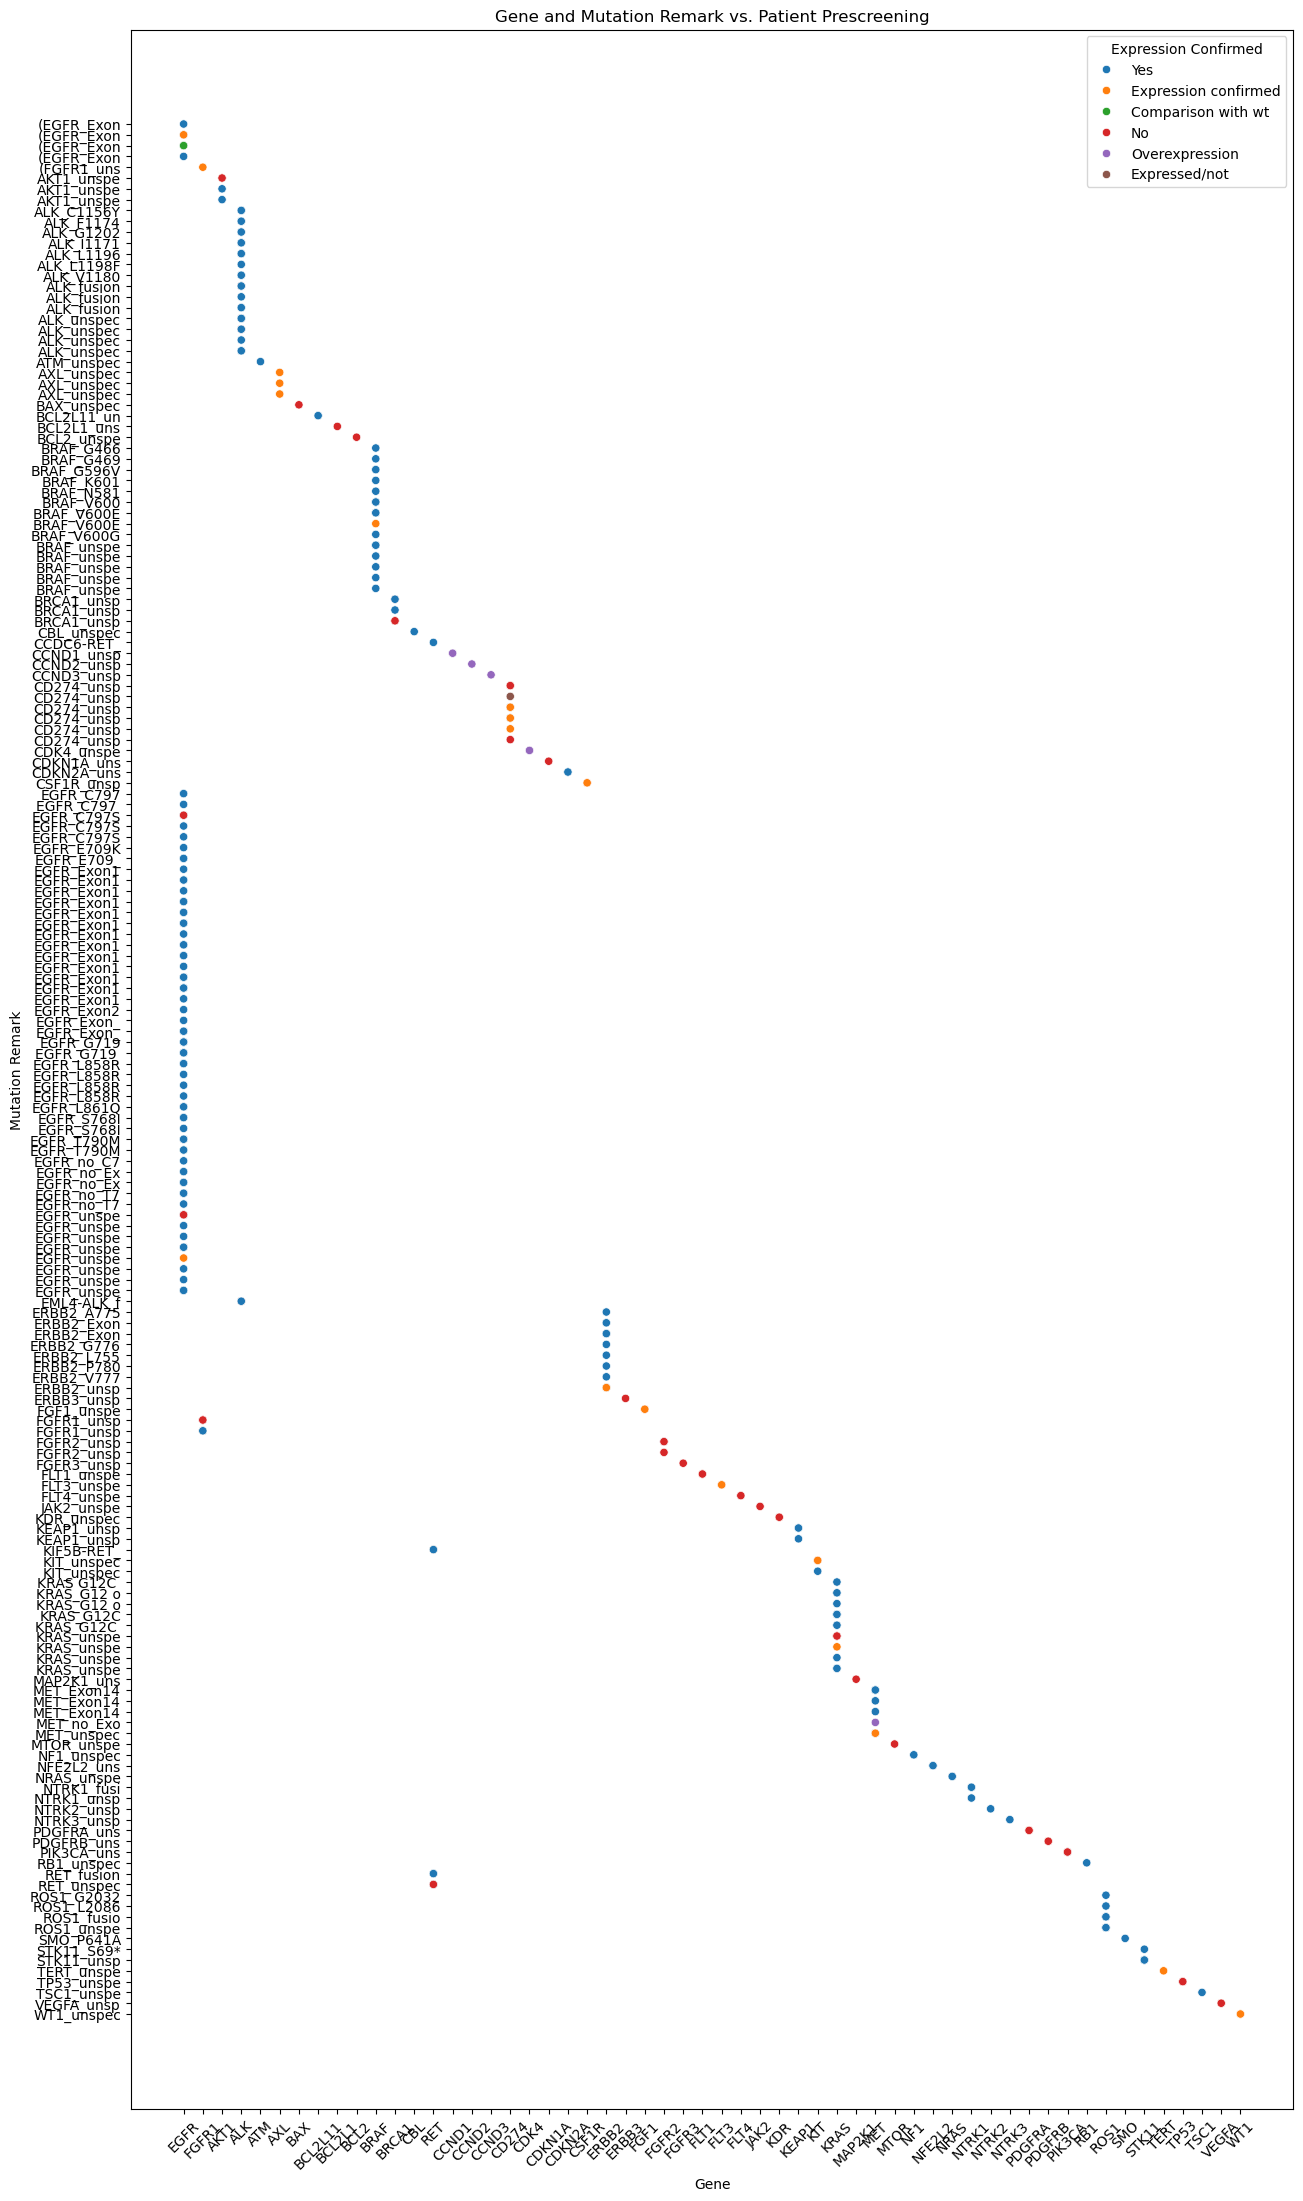

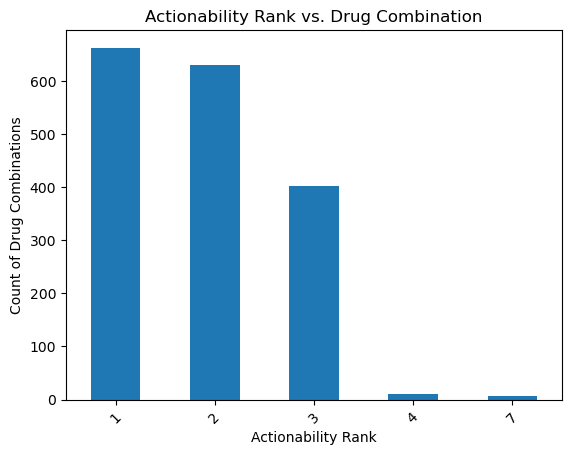

>sp|Q9NYL2.3|M3K20_HUMAN RecName: Full=Mitogen-activated protein kinase kinase kinase 20; AltName: Full=Human cervical cancer suppressor gene 4 protein; Short=HCCS-4; AltName: Full=Leucine zipper- and sterile alpha motif-containing kinase; AltName: Full=MLK-like mitogen-activated protein triple kinase; AltName: Full=Mitogen-activated protein kinase kinase kinase MLT; AltName: Full=Mixed lineage kinase 7; AltName: Full=Mixed lineage kinase-related kinase; Short=MLK-related kinase; Short=MRK; AltName: Full=Sterile alpha motif- and leucine zipper-containing kinase AZK
MSSLGASFVQIKFDDLQFFENCGGGSFGSVYRAKWISQDKEVAVKKLLKIEKEAEILSVLSHRNIIQFYG
VILEPPNYGIVTEYASLGSLYDYINSNRSEEMDMDHIMTWATDVAKGMHYLHMEAPVKVIHRDLKSRNVV
IAADGVLKICDFGASRFHNHTTHMSLVGTFPWMAPEVIQSLPVSETCDTYSYGVVLWEMLTREVPFKGLE
GLQVAWLVVEKNERLTIPSSCPRSFAELLHQCWEADAKKRPSFKQIISILESMSNDTSLPDKCNSFLHNK
AEWRCEIEATLERLKKLERDLSFKEQELKERERRLKMWEQKLTEQSNTPLLPSFEIGAWTEDDVYCWVQQ
LVRKGDSSAEMSVYASLFKENNITGKRLLLLEEEDLKDMGIVSKGHIIHFKSAIEKLTHDYINLFHFPPL
IK

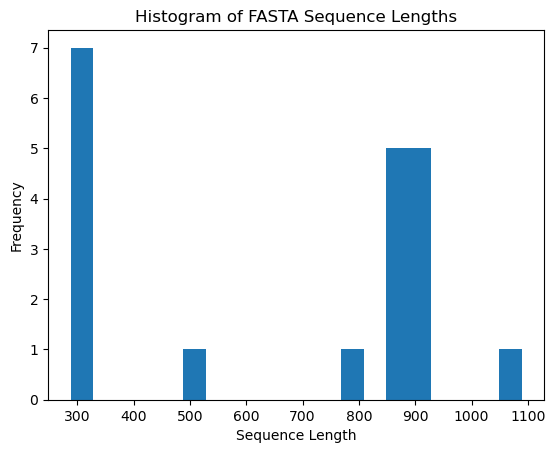

    Entry   Entry Name  Reviewed  \
0   Entry   Entry Name  Reviewed   
1  Q01534  TSPY1_HUMAN  reviewed   
2  Q9UHX3  AGRE2_HUMAN  reviewed   
3  P22888   LSHR_HUMAN  reviewed   
4  Q16620  NTRK2_HUMAN  reviewed   

                                       Protein Names             Gene Names  \
0                                      Protein names             Gene Names   
1  Testis-specific Y-encoded protein 1 (Cancer/te...             TSPY1 TSPY   
2  Adhesion G protein-coupled receptor E2 (EGF-li...            ADGRE2 EMR2   
3  Lutropin-choriogonadotropic hormone receptor (...  LHCGR LCGR LGR2 LHRHR   
4  BDNF/NT-3 growth factors receptor (EC 2.7.10.1...             NTRK2 TRKB   

               Organism  Length  
0              Organism  Length  
1  Homo sapiens (Human)     308  
2  Homo sapiens (Human)     823  
3  Homo sapiens (Human)     699  
4  Homo sapiens (Human)     822  


C:\Users\FireR\AppData\Local\Temp\ipykernel_20168\109026132.py:116: DtypeWarning: Columns (27,28,30,34,44,48,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv(file_path, delimiter='\t')


      GENE   MUTATION_REMARK                                      DISEASE  \
282    ALK   ALK_unspecified  lung / carcinoma / non small cell carcinoma   
283    ALK   ALK_unspecified  lung / carcinoma / non small cell carcinoma   
284    ALK   ALK_unspecified  lung / carcinoma / non small cell carcinoma   
285    ALK   ALK_unspecified  lung / carcinoma / non small cell carcinoma   
286    ALK   ALK_unspecified  lung / carcinoma / non small cell carcinoma   
...    ...               ...                                          ...   
8786   RET       RET_fusions  lung / carcinoma / non small cell carcinoma   
8787   RET       RET_fusions  lung / carcinoma / non small cell carcinoma   
8788   RET       RET_fusions  lung / carcinoma / non small cell carcinoma   
8876  ROS1      ROS1_fusions  lung / carcinoma / non small cell carcinoma   
8901  ROS1  ROS1_unspecified  lung / carcinoma / non small cell carcinoma   

      ACTIONABILITY_RANK DEVELOPMENT_STATUS DRUG_COMBINATION  \
282        

In [27]:
# Part 0
# The following libraries are all imported according to the final assignment page on Brightspace
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import shutil
import re
import textwrap
from io import StringIO
from bioservices import KEGG, UniProt
from Bio import Entrez, SeqIO
from Bio.KEGG import REST
from Bio.KEGG.KGML import KGML_parser
from Bio.Graphics.KGML_vis import KGMLCanvas
from IPython.display import Image, HTML, display

# Part 1
# The function is defined with the file path, search term, and the output file in which the results will go into.
def parse_action_file(file_path, search_term, output_file):
    # The file is loaded into the 'df' dataframe using pd.read_csv to read the file. The delimiter='\t' is added as it is tab delimited.
    df = pd.read_csv(file_path, delimiter='\t')
    # Whitespace is removed from the columns using the columns.str.strip method and the .str.upper method, with empty parentheses to indicate whitespace.
    df.columns = df.columns.str.strip().str.upper()
    # The rows are filtered based on the search term using the str.contains method, indicating that the function will look for the search term in the 'DISEASE' column.
    filtered_df = df[df['DISEASE'].str.contains(search_term, case=False, na=False)]
    # The columns are then listed and defined as 'columns'.
    columns = ['GENE', 'MUTATION_REMARK', 'DISEASE', 'ACTIONABILITY_RANK', 'DEVELOPMENT_STATUS', 'DRUG_COMBINATION', 'PRIMARY_OUTCOME_MEASURE', 'TRIAL_STATUS', 'PATIENT_PRESCREENING']
    # The relevant columns are returned to the new dataframe defines as 'result_df".
    result_df = filtered_df[columns]
    # The dataframe is written to a .csv file using the .to_csv() method.
    result_df.to_csv(output_file, index=False)
    # The new dataframe is returned using the return function.
    return result_df

# The function is then used on the actionability data text file, with the search term "lung / carcinoma / non small cell carcinoma", and the output file being the path of the file within the local machine.
action_df = parse_action_file("D:/Downloads/ActionabilityData.txt","lung / carcinoma / non small cell carcinoma", 'D:/Downloads/action_df.csv')
action_df

# Part 2
# The function is defined with the dataframe and the output file in which the results will go into.
def plot_gm_vs_pr(df, plot_file):
    # The plot figure size is determined by trial and error, and changed by using the .figure method.
    plt.figure(figsize=(15,27))
    # The scatterplot is generated by using the scatterplot method.
    ax = sns.scatterplot(x='GENE', y='MUTATION_REMARK', hue='PATIENT_PRESCREENING', data=df)
    # The title, labels, and legend of the scatterplot is done by using the .title, .xlabel, .ylabel, and .legend methods.
    plt.title('Gene and Mutation Remark vs. Patient Prescreening')
    plt.xlabel('Gene')
    plt.ylabel('Mutation Remark')
    plt.legend(title='Expression Confirmed', loc='upper right')
    # The ticks are made more readable using .xticks.
    plt.xticks(rotation=45)
    # The sizes of the labels are changed using the .get_text, .get_yticklabels, and .set_yticklabels methods.
    max_length = 10
    labels = [label.get_text() for label in ax.get_yticklabels()]
    short_label = [label[:max_length] for label in labels]
    ax.set_yticklabels(short_label)
    # The plot is saved to a pdf file by using the .savefig method.
    plt.savefig(plot_file, bbox_inches='tight', format='pdf')
    # The plot is shown using the .show method.
    plt.show()

# The function is then used to plot the data.
plot_gm_vs_pr(action_df, "D:\Downloads\plot_gm_vs_pr.pdf")

# Part 3
# The function is defined with the dataframe and the output file in which the results will go into.
def plot_action_vs_drug(df, plot_file):
     # The plot figure size is determined by trial and error, and changed by using the .figure method.
    plt.figure()
    # The dataframe is grouped by the following two columns by using the .groupby method.
    action_counts = df.groupby('ACTIONABILITY_RANK')['DRUG_COMBINATION'].count()
    # A bar graph is plotted using the .plot method and specifying 'bar' for kind of graph.
    action_counts.plot(kind='bar')
    # The title, labels, and legend of the scatterplot is done by using the .title, .xlabel, .ylabel, and .legend methods.
    plt.title('Actionability Rank vs. Drug Combination')
    plt.xlabel('Actionability Rank')
    plt.ylabel('Count of Drug Combinations')
    plt.xticks(rotation=45)
    # The plot is saved to a pdf file by using the .savefig method.
    plt.savefig(plot_file, bbox_inches='tight', format='pdf')
    # The plot is shown using the .show method.
    plt.show()

# The function is then used to plot the data.
plot_action_vs_drug(action_df, "D:\Downloads\plot_action_vs_drug.pdf")

# Part 4
# The function is defined with the search term and the output file in which the results will go into.
def fetch_pro_pub(search_term, output_file):
    # School email is used here to access NBCI servers.
    Entrez.email = 'jdm808@nyu.edu'
    # A file handle is created in which we search the "protein" db, done by using .esearch. The term is set to the previously assigned "search".
    handle = Entrez.esearch(db="protein", term=search_term, retmax=100)
    # The record variable is defined as the variable that will hold the esearch output.
    record = Entrez.read(handle)
    # The variable "idList" is defined as the variable that will hold the list output.
    ids = record["IdList"]
    # The efetch method is used in order to grab the information based on the joined idList, now called ids. The output will be in fasta format, specified by rettype="fasta". retmode="text" returns the output in plain text.
    fasta_handle = Entrez.efetch(db="protein", id=ids, rettype="fasta",retmode="text")
    # fetch_handle is read using the .read function.
    fasta_seq = fasta_handle.read()
    # A file handle is created in which we search the "pubmed" db, done by using .esearch. The term is then set. As
    # stated in the homework question, the parameter for the amount of sequences to be returned is to be 100.
    pubmed_han = Entrez.esearch(db='pubmed', term=search_term, retmax=100)
    # The record variable is defined as the variable that will hold the esearch output.
    pubmed_rec = Entrez.read(pubmed_han)
    # The variable "pubmed_ids" is defined as the variable that will hold the list output.
    pubmed_ids = pubmed_rec["IdList"]
    # The results will then be written to the output file.
    with open(output_file, 'w') as file:
        file.write("FASTA Sequences:\n")
        file.write(fasta_seq + '\n\n')
        file.write('PubMed IDs:\n')
        for pubmed)id in pubmed_ids:
            file.write(pubmed_id + "\n")
    # The results are then returned.
    return fasta_seq, pubmed_ids
# The function is then ran and the results are written out to the output file.
fasta_seq, pubmed_ids = fetch_pro_pub("disease and Nilotinib", "D:/Downloads/pro_pub_results.txt")
print(fasta_seq)

print(pubmed_ids)

# The function is defined with the dataframe previously defined in the first step of Part 4 and the output file in which the results will go into.
def plot_fasta_len(fasta_seq, plot_file):
    # StringIO is used to treat the string like a file.
    fasta_io = StringIO(fasta_seq)
    # The FASTA sequences are then parsed.
    fasta_rec = SeqIO.parse(fasta_io, 'fasta')
    # The lengths of the sequences are obtained.
    lengths = [len(record.seq) for record in fasta_rec]
    # The plot figure size is determined by trial and error, and changed by using the .figure method.
    plt.figure()
    # A histogram is plotted using the .hist method.
    plt.hist(lengths, bins=20)
    # The title, labels, and legend of the scatterplot is done by using the .title, .xlabel, .ylabel, and .legend methods.
    plt.title('Histogram of FASTA Sequence Lengths')
    plt.xlabel('Sequence Length')
    plt.ylabel('Frequency')
    # The plot is saved to a pdf file by using the .savefig method.
    plt.savefig(plot_file, bbox_inches='tight', format='pdf')
    # The plot is shown using the .show method.
    plt.show()

# The function is then used to plot the data.
plot_fasta_len(fasta_seq, "D:\Downloads\plot_fasta_len.pdf")

# Part 5
# The function is defined with the disease name, output text file, and the output pdf file.
def fetch_kegg_pathway(disease_name, output_txt_file, output_pdf_file):
    # The bioservices session is created and the KEGG object is created. 
    k = KEGG(verbose=False)
    # The dbinfo method is used with the previously created KEGG object in order to query the term, in this case
    # 'disease'.
    db_info = k.dbinfo('disease')
    # The find method is then used to query.
    find = k.find('disease', disease_name)
    # The results will then be written to the output file.
    with open (output_txt_file, 'w') as file:
        file.write(find)
    # The find method is then used again for the pathway.
    pathway_id = k.find('pathway', disease_name)
    # The .split function is done as the pathway ID is the first item in the list.
    pathway_id = pathway_id.split()[0]
    return
    # The .get method is used to get the pathway image from KEGG
    res = k.get(pathway_id, 'image')
    # The pathway image is then displayed.
    img = Image(res.read())
    display(img)
    # The pathway map image is then saved to the output pdf file using the following code
    pathway_kgml = k.get(pathway_id, 'kgml')
    pathway = KGML_parser.read(pathway_kgml)
    canvas = KGMLCanvas(pathway)
    canvas.import_imagemap = True
    canvas.draw(output_pdf_file)

# The function is then ran on the search term.
fetch_kegg_pathway('non-small cell lung cancer', "D:/Downloads/disease_final_results.txt", 'D:/Documents/disease2.pdf')

# Part 6 and 7
# The function is defined with the query term and the output file in which the results will go into.
def fetch_uniprot_data(query, output_file):
    # The UniProt object is created.
    u = UniProt
    # The .search method is used to search the query.
    result = u.search(query, frmt="tsv")
    # The results are split into rows and columns using the .split and .strip methods.
    rows = result.strip().split('\n')
    data = [row.split('\t') for row in rows]
    # The columns are defined.
    columns = ["Entry", "Entry Name", "Reviewed", "Protein Names", "Gene Names", "Organism", "Length"]
    # The dataframe is created using the .DatFrame method.
    df2 = pd.DataFrame(data, columns=columns)
    # The dataframe is written to the output file using the to.csv method.
    df2.to_csv(output_file, index = False)
    return df2

# The query is defined.
query = "family:'Protein Name'AND comment(DISEASE)"
# The function is applied to the query and it's results are written to the output file.
df2 = fetch_uniprot_data(query, "D:/Downloads/uniprot_results.csv")

# Part 8 and 9
# The function is defined with the search term and the output file in which the results will go into.
def fetch_human_fasta(search_term, file_path):
    # The UniProt object is created.
    u = UniProt()
    # The query is defined to search for human proteins
    query = f"{search_term} AND organism_name:human"
    # The .search method is used to search the query.
    result = u.search(query, frmt="fasta")
    # The results are written to the file_path using the .write method.
    with open(file_path, 'w') as f:
        f.write(result)

# The function is applied for the "Gefitinib" term and written to the output file.
fetch_human_fasta("Gefitinib", "D:/Downloads/humanfasta.txt")

# Part 10
# This part is similar to the part 5, so the steps are the same.
# The function is defined with the output file in which the results will go into.
def parse_action2_file(file_path):
    df3 = pd.read_csv(file_path, delimiter='\t')
    df3.columns = df3.columns.str.strip().str.upper()
    filtered_df3 = df3[(df3['DISEASE'].str.contains('lung / carcinoma / non small cell carcinoma', case=False, na=False)) & (df3['DEVELOPMENT_STATUS'] == 'Approved FDA')]
    columns = ['GENE', 'MUTATION_REMARK', 'DISEASE', 'ACTIONABILITY_RANK', 'DEVELOPMENT_STATUS', 'DRUG_COMBINATION', 'PRIMARY_OUTCOME_MEASURE', 'TRIAL_STATUS', 'PATIENT_PRESCREENING']
    result_df3 = filtered_df3[columns]
    return result_df3

actionability_df = parse_action2_file("D:/Downloads/ActionabilityData.txt")
print(actionability_df)

# The function is defined with the disease name, the output text file, and the output .pdf file in which the results will go into.
def fetch_kegg_pathway_fda(disease_name, output_txt_file, output_pdf_file):
    k = KEGG(verbose=False)
    db_info = k.dbinfo('disease')
    find = k.find('disease', disease_name)
    with open (output_txt_file, 'w') as file:
        file.write(find)
    pathway_id = k.find('pathway', disease_name)
    pathway_id = pathway_id.split()[0]
    return
    res = k.get(pathway_id, 'image')
    img = Image(res.read())
    display(img)
    pathway_kgml = k.get(pathway_id, 'kgml')
    pathway = KGML_parser.read(pathway_kgml)
    canvas = KGMLCanvas(pathway)
    canvas.import_imagemap = True
    canvas.draw(output_pdf_file)

fetch_kegg_pathway_fda('non-small cell lung cancer', "D:/Downloads/fdacarcinoma.txt", "D:/Documents/fdadisease3.pdf")

# Answers for the questions to summarize findings.
# First, the scatter plot of Gene and Mutation Remark vs. Patient Prescreening is done to help visualize the relationship between gene mutations and 
# patient prescreening. The plot shows whether mutations correlate with expression confirmation or not. Second, the bar chart created to show
# Actionability Rank vs Drug Combination is done to show how different actionability ranks are associated with specific drug combinations.
# This information can be used to understand potential treatments for the condition, showing that the higher the actionability rank, the higher the
# number of drug combinations are. A histogram of FASTA sequence lengths was also created from the analysis of the sequences. Using the histogram,
# the distribution of protein sizes can be seen, as certain sequence lengths (like a sequence length of 300) was seen much more often (7) than other
# sequence lengths. A visualization of the Non-Small Cell Lung Cancer was also geneerated from KEGG. This offers a visual representation of all the
# biological processes involded in the making and survival of the disease. This is greatly effective in discovering potential new drugs for treating
# the disease that will target specific pathways. An MSA would be run on a group of proteins that are targets for non small cell carcinoma in order to 
# better understand protein functions, evolution, and potential treatments to assist proteins that are targets. More specifically, it helps identifying biomarkers
# and better understanding resistance mechanisms, in order to improve treatments.A UniProt analysis was run in order to provide a structured overview of the 
# proteins that are involved within non-small cell carcinoma. The COSMIC ACTIONABILITY file tells us the mutations that may be targeted by drug and 
# other treatment options. Overall, the analysis provides insight into the mutation of genes that are involved with Non-Small
# Cell Lung Cancer and well as the biological pathways of the disease.

In [64]:
# Part 6 and 7
def fetch_uniprot_data(query, output_file):
    u = UniProt()
    result = u.search(query, frmt="tsv")
    rows = result.strip().split('\n')
    data = [row.split('\t') for row in rows]
    columns = ["Entry", "Entry Name", "Reviewed", "Protein Names", "Gene Names", "Organism", "Length"]
    df2 = pd.DataFrame(data, columns=columns)
    df2.to_csv(output_file, index = False)
    return df2

query = "family:'Protein Name'AND comment(DISEASE)"
df2 = fetch_uniprot_data(query, "D:/Downloads/uniprot_results.csv")